In [1]:
from collections import namedtuple
import re
import sys
import time

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from gopatterns.common import *
from utils.jgoboard_utils import *

In [4]:
# This cell is specific to aggregating LeelaZero training game pattern extraction, which was done in two chunks
csv_pathnames = ["leelazero_lz_matches_min2_max6_20180325_first_index0_max_num_versions200_max_games_per_version1000.csv",
                "leelazero_lz_matches_min7_max12_20180325_first_index0_max_num_versions200_max_games_per_version1000.csv"]

csv_files = []
for csv_pathname in csv_pathnames:
    csv_files.append(pd.read_csv(csv_pathname))
collection_df = pd.concat(csv_files)

print(collection_df.columns, collection_df.shape)
aggregated_filename = "leelazero_lz_matches_all_20180325_corners9x9_stones.min2_max12_max_games_per_version1000.csv"
collection_df.to_csv(aggregated_filename, index=None)

(Index(['pattern', 'version'], dtype='object'), (4046488, 2))

In [4]:
dataset_name = r"C:\Users\sorin\Documents\GitHub\gopatterns\collection_human_games_9.9.2.12.100.True_numgames_202804.csv"

In [5]:
collection_df = pd.read_csv(dataset_name) # , nrows=1000000)

In [6]:
collection_df.columns, collection_df.shape

(Index(['pattern', 'sgf_filename', 'year'], dtype='object'), (6657263, 3))

In [7]:
collection_df.head()

,pattern,sgf_filename,year
0,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\aeb\games\Agon...,1994
1,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\aeb\games\Agon...,1994
2,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\aeb\games\Agon...,1994
3,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,C:\Users\sorin\kifu\collections\aeb\games\Agon...,1994
4,. . . . . . . . . =\r\n. . . . . . b . . =\r\n...,C:\Users\sorin\kifu\collections\aeb\games\Agon...,1994


In [21]:
years, freqs = tuple(zip(*sorted(collection_df['year'][collection_df['year'] >= 1800].value_counts().items(), key=lambda x: x[0])))

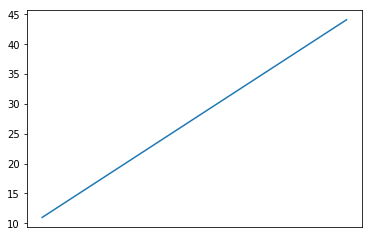

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([11, 22, 33, 44])
# ax.set_xticklabels(['d', 'a', 'c', 'b'])

plt.tick_params(
                axis='x', 
                which='both',
                bottom='off',
                top='off',
                labelbottom='off')

plt.show()

[Text(0,0,'y'),
 Text(0,0,'d'),
 Text(0,0,'a'),
 Text(0,0,'c'),
 Text(0,0,'b'),
 Text(0,0,'x')]

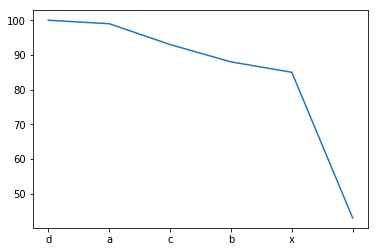

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = [100, 99, 93, 88, 85, 43]
xt = ('y', 'd', 'a', 'c', 'b', 'x')# [0, 5, 4, 3, 2, 1]
ax.plot(y)
ax.set_xticklabels(xt)

<Container object of 215 artists>

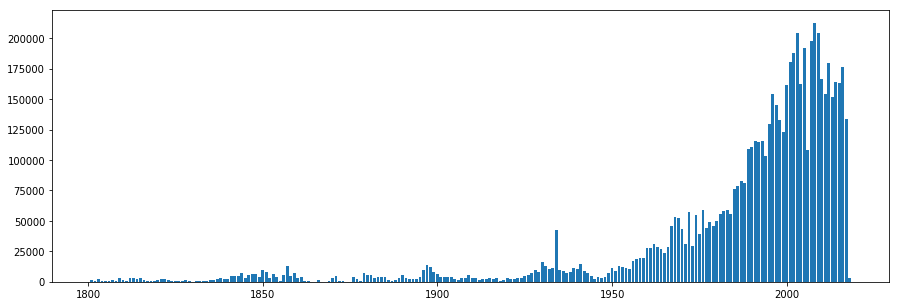

In [36]:
plt.figure(figsize=(15, 5))
plt.bar(years, freqs)

In [35]:
timeline_column = 'year'
min_epoch = '1900'
print(collection_df[timeline_column].dtype)
if collection_df[timeline_column].dtype != np.object:
    min_epoch = int(min_epoch)
collection_df[collection_df[timeline_column] >= min_epoch].shape

int64


(6306880, 3)

In [28]:
collection_df['year'].dtype

dtype('int64')

In [24]:
# This cell is doing analysis and filtering to identify patterns that only occur once
collection_df = collection_df.sort_values(by='pattern')
non_unique_rows = []
unique_rows = []
current_pattern = None
current_pattern_count = 0
num_uniques = 0
count = 0
for _, data in collection_df2.iterrows():
    count += 1
    if count % 100000 == 0:
        print("count:", count, "uniques:", num_uniques, "non-uniques:", len(non_unique_rows))
    if current_pattern is None:
        current_pattern = data.copy()
        current_pattern_count = 1
    else:
        if data['pattern'] == current_pattern['pattern']:
            current_pattern_count += 1
            if current_pattern_count == 2:
                non_unique_rows.append(current_pattern.copy())
            non_unique_rows.append(data.copy())
        else:
            # Found new one
            if current_pattern_count == 1:
                num_uniques += 1
                unique_rows.append(current_pattern.copy())
            current_pattern_count = 1
            current_pattern = data.copy()

count: 100000 uniques: 4283 non-uniques: 95716
count: 200000 uniques: 6428 non-uniques: 193571
count: 300000 uniques: 17790 non-uniques: 282209
count: 400000 uniques: 39171 non-uniques: 360828
count: 500000 uniques: 83900 non-uniques: 416099
count: 600000 uniques: 125973 non-uniques: 474025
count: 700000 uniques: 197913 non-uniques: 502085
count: 800000 uniques: 274573 non-uniques: 525425
count: 900000 uniques: 347478 non-uniques: 552520
count: 1000000 uniques: 426867 non-uniques: 573131


In [25]:
print(unique_rows[200].pattern)

. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . b . =
b . . . . . . . . =
. . . b . . . . . =
= = = = = = = = = =


In [26]:
print(non_unique_rows[10000].pattern)

. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . b . . . . . =
. . . . . . . . . =
= = = = = = = = = =


In [27]:
len(non_unique_rows)

573131

In [28]:
type(non_unique_rows[0])

pandas.core.series.Series

In [29]:
prev_pat = None
prev_pat_cnt = 0
dist_counts = []
for row in non_unique_rows[:10000]:
    p = row.pattern
    v = row.version
    if prev_pat != p:
        dist_counts.append(prev_pat_cnt)
        prev_pat = p
        prev_pat_cnt = 1
    else:
        prev_pat_cnt += 1

(array([ 275.,    8.,    3.,    2.,    2.,    0.,    0.,    0.,    0.,    2.]),
 array([    0. ,   124.5,   249. ,   373.5,   498. ,   622.5,   747. ,
          871.5,   996. ,  1120.5,  1245. ]),
 <a list of 10 Patch objects>)

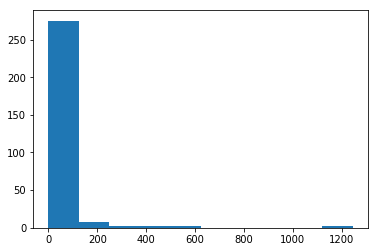

In [30]:
plt.hist(dist_counts)

In [15]:
collection_no_uniques = pd.DataFrame(non_unique_rows)

In [16]:
collection_no_uniques.shape

(447023, 2)

In [32]:
aggregated_filename_no_uniques = "no_uniques_" + dataset_name

In [39]:
aggregated_filename_no_uniques

'no_uniques_leelazero_lz_matches_9.9.2.10.100.True_TEST_first_index0_max_num_versions200_max_games_per_version1000.csv'

In [33]:
collection_no_uniques.to_csv(aggregated_filename_no_uniques, index=None)

In [34]:
collection_no_uniques2 = pd.read_csv(aggregated_filename_no_uniques)

In [35]:
collection_no_uniques.columns, collection_no_uniques.shape, collection_no_uniques2.columns, collection_no_uniques2.shape

(Index(['pattern', 'version'], dtype='object'),
 (447023, 2),
 Index(['pattern', 'version'], dtype='object'),
 (447023, 2))

In [36]:
collection_no_uniques.head()

,pattern,version
886717,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,0d3ce145
886760,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,fe3f6afd
946340,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,0d3ce145
946383,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,fe3f6afd
346214,. . . . . . . . . =\r\n. . . . . . . . . =\r\n...,d5b7aec3


In [37]:
print(collection_no_uniques.iloc[100].pattern)

. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b w . =
. . . . . . . . . =
= = = = = = = = = =


In [38]:
print(collection_no_uniques2.iloc[1001].pattern)










= = = = = = = = = =
